In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# accuracy plots

Index([u'iter', u'k', u'algo', u'time', u'relerr'], dtype='object')


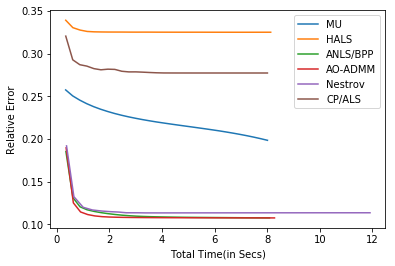

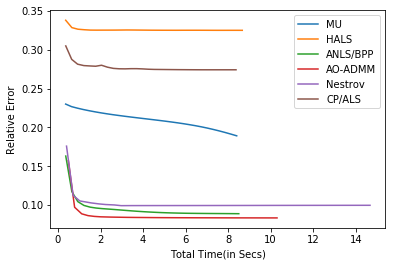

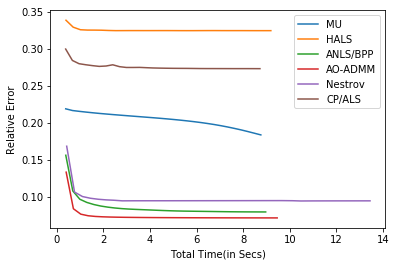

In [26]:
frame=pd.read_csv('accuracymousep64ksweep_nesterov20.dat', delimiter=' ', header=0, comment='#')
print frame.columns
# frame_subset=frame[[u'k',u'totaltime',u'algo',u'relerr',u'gpu']]
frame_subset=frame[[u'k',u'time',u'algo',u'relerr']]
for lowrank in [32, 64, 96]:
    #frame_k=frame_subset.loc[(frame_subset['k']==lowrank) & frame_subset['gpu']==1]
    frame_k=frame_subset.loc[(frame_subset['k']==lowrank)]
    fig, ax = plt.subplots()
    for key, grp in frame_k.groupby(['algo']):
        ax = grp.plot(ax=ax, kind='line', x='time', y='relerr', label=key)
    plt.legend(['MU','HALS','ANLS/BPP','AO-ADMM','Nestrov','CP/ALS'],loc='best')
    plt.ylabel('Relative Error')
    plt.xlabel('Total Time(in Secs)')
    plt.show()
    fig.savefig('plots/accuracymouse'+str(lowrank)+'.pdf')
    

# Timing Comparison between CPU vs GPU

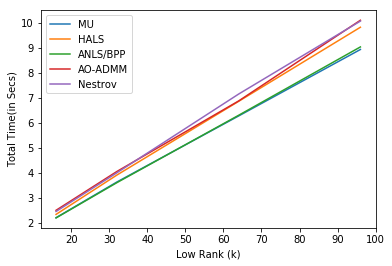

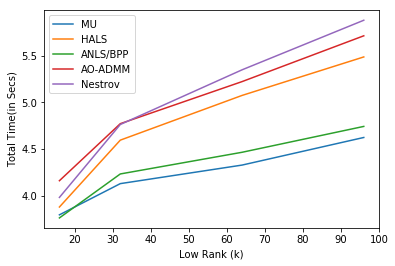

In [23]:
frame=pd.read_csv('accuracylr81pksweep.csv', delimiter='\t', header=0)
frame_subset=frame[[u'iter',u'k',u'totaltime',u'algo',u'gpu']]
for gpu in [0, 1]:
    #frame_k=frame_subset.loc[(frame_subset['k']==lowrank) & frame_subset['gpu']==1]
    frame_k=frame_subset.loc[(frame_subset['gpu']==gpu) & (frame_subset['iter']==29)]
    fig, ax = plt.subplots()
    for key, grp in frame_k.groupby(['algo']):
        ax = grp.plot(ax=ax, kind='line', x='k', y='totaltime', label=key, markers=True)
    plt.legend(['MU','HALS','ANLS/BPP','AO-ADMM','Nestrov'],loc='best')
    plt.xlabel('Low Rank (k)')
    plt.ylabel('Total Time(in Secs)')
    plt.show()
    fig.savefig('plots/cpuvsgpulr81'+str(gpu)+'.pdf')

     iter     k     time  algo
29   29.0  16.0  43.3640   0.0
209  29.0  32.0  43.8092   0.0
389  29.0  48.0  43.5382   0.0
569  29.0  64.0  43.8717   0.0
748  29.0  96.0  44.7691   0.0
     iter     k     time  algo
59   29.0  16.0  43.4414   1.0
239  29.0  32.0  43.9051   1.0
419  29.0  48.0  43.7033   1.0
599  29.0  64.0  44.1302   1.0
778  29.0  96.0  45.2023   1.0
     iter     k     time  algo
89   29.0  16.0  43.3931   2.0
269  29.0  32.0  43.7612   2.0
449  29.0  48.0  43.4974   2.0
629  29.0  64.0  43.9194   2.0
808  29.0  96.0  44.8594   2.0
     iter     k     time  algo
119  29.0  16.0  43.4958   4.0
299  29.0  32.0  44.0172   4.0
479  29.0  48.0  43.6698   4.0
659  29.0  64.0  44.2494   4.0
838  29.0  96.0  45.4615   4.0
     iter     k     time  algo
149  29.0  16.0  59.3209   5.0
329  29.0  32.0  60.1559   5.0
509  29.0  48.0  59.8192   5.0
689  29.0  64.0  60.5081   5.0
868  29.0  96.0  61.3044   5.0
     iter     k     time  algo
179  29.0  16.0  43.3346   6.0
359  29.

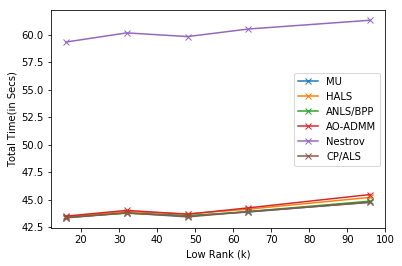

In [15]:
frame=pd.read_csv('accuracylr81pksweep_nesterov20_gpu.csv', delimiter=' ', header=0)
frame_subset=frame[[u'iter',u'k',u'time',u'algo']]
fig, ax = plt.subplots()
frame_k= frame_subset.loc[frame_subset['iter']==29]
for key, grp in frame_k.groupby(['algo']):
    print(grp)
    ax = grp.plot(ax=ax, kind='line', x='k', y='time', label=key, marker='x')
plt.legend(['MU','HALS','ANLS/BPP','AO-ADMM','Nestrov','CP/ALS'],loc='best')
plt.xlabel('Low Rank (k)')
plt.ylabel('Total Time(in Secs)')
plt.show()
fig.savefig('plots/cpuvsgpulr811'+'.pdf')

# LUC Comparison

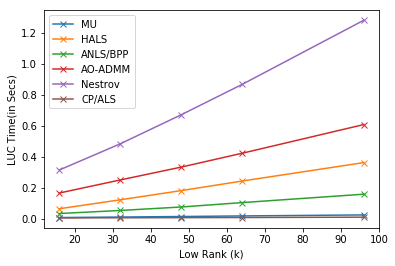

In [24]:
frame=pd.read_csv('lucmousep64ksweep_nesterov20.csv', delimiter=' ', header=0)
fig, ax = plt.subplots()
for key, grp in frame.groupby(['algo']):
    ax = grp.plot(ax=ax, kind='line', x='k', y='nnls', label=key, marker='x')
plt.legend(['MU','HALS','ANLS/BPP','AO-ADMM','Nestrov', 'CP/ALS'],loc='best')
plt.xlabel('Low Rank (k)')
plt.ylabel('LUC Time(in Secs)')
plt.show()
fig.savefig('plots/lucmouse64'+'.pdf')

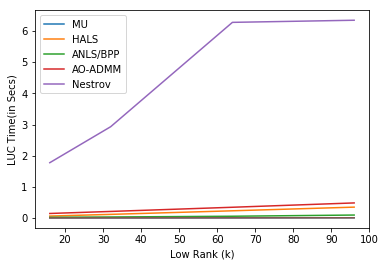

In [44]:
frame=pd.read_csv('lucrwp64ksweep.csv', delimiter='\t', header=0)
fig, ax = plt.subplots()
for key, grp in frame.groupby(['algo']):
    ax = grp.plot(ax=ax, kind='line', x='k', y='nnls', label=key)
plt.legend(['MU','HALS','ANLS/BPP','AO-ADMM','Nestrov'],loc='best')
plt.xlabel('Low Rank (k)')
plt.ylabel('LUC Time(in Secs)')
plt.show()
fig.savefig('plots/lucrw64'+'.pdf')